In [ ]:
# Load the File and Create a DF #

In [2]:
########################################
##
## Clustering Record and Text Data  Python
##
####################################################
## Hengxin Wu
####################################################

import nltk
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D
#from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn import metrics

warnings.filterwarnings('ignore')

os.chdir('/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering')

## Read the corpus files into a Document Term Matrix Object (or DTM)

path = "/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering"

## Make a blank list
MyFileNameList = []
## Also - let's same the names of the files (not the paths)
## in another list.
FileNames = []

for nextfile in os.listdir(path):
    fullpath = path + "/" + nextfile
    # print(fullpath)
    MyFileNameList.append(fullpath)
    ## let's place the files names (not the path too)
    ## into our other list
    FileNames.append(nextfile)

## print the list....
MyFileNameList.remove('/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/.DS_Store')
FileNames.remove('.DS_Store')
print(MyFileNameList)
print("\\\\\\\\\\\\\\\/n")
print(FileNames)

MyCV = CountVectorizer(input='filename',
                       stop_words='english',
                       # max_features=100
                       token_pattern=r'[a-zA-Z]{2,}',
                       )

My_DTM = MyCV.fit_transform(MyFileNameList)

## TWO Steps:
## First - use your CountVectorizer to get all the column names
MyColumnNames = MyCV.get_feature_names()

## NEXT - Use pandas to create data frames
My_DF = pd.DataFrame(My_DTM.toarray(), columns=MyColumnNames)

## Now - let's add the labels.

CleanNames = []

for filename in FileNames:
    newName = filename.split(".")
    # print(newName[0])
    ## remove any numbers
    newName2 = re.sub(r"[^A-Za-z0-9]+$", "", newName[0])
    print(newName2)
    CleanNames.append(newName2)

## Let's see if we did it...
print(CleanNames)

## OK!

## Now - let's add these labels as a column to our DF

## RIght now we have
print(My_DF)

## Add the column

My_DF["LABEL"] = CleanNames
cols = My_DF.columns.tolist()
cols = cols[-1:] + cols[:-1]
My_DF = My_DF[cols]

print(My_DF)

My_DF.to_csv('MyTxtFile.csv', index=False)

DF_Count = My_DF
DF_Count = DF_Count.drop(columns = "LABEL")
DF_Count = DF_Count.set_axis(FileNames, axis='index')
# Using sklearn
## you will need
## from sklearn.cluster import KMeans
## import numpy as np

['/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 7.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 6.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 4.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Realms of the Soil 9.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Realms of the Soil 8.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Realms of the Soil 10.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 5.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 1.txt', '/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clustering/Rivers of Death 2.txt', "/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/txt clus

In [ ]:
# WordCloud #

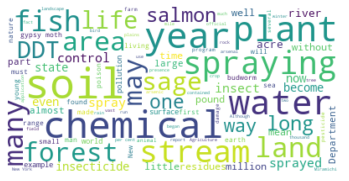

In [119]:
data = ''
for i in range(0, 50):
    dataname = MyFileNameList[i]
    with open(dataname) as fp:
        str = ' '
        newdata1 = fp.read()
        pattern = re.compile(r'[a-zA-Z]{2,}')
        newdata1 = str.join(pattern.findall(newdata1))
        data = data + newdata1

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/clustering/wordcloud.png")


In [ ]:
# Using PCA to reduce the dimension #

                                                able  absorbed  absurdity  \
Rivers of Death 7.txt                      -0.141421 -0.202073  -0.141421   
Rivers of Death 6.txt                      -0.141421 -0.202073  -0.141421   
Rivers of Death 4.txt                      -0.141421 -0.202073  -0.141421   
Realms of the Soil 9.txt                   -0.141421 -0.202073  -0.141421   
Realms of the Soil 8.txt                   -0.141421 -0.202073  -0.141421   
Realms of the Soil 10.txt                  -0.141421 -0.202073  -0.141421   
Rivers of Death 5.txt                      -0.141421 -0.202073  -0.141421   
Rivers of Death 1.txt                      -0.141421 -0.202073  -0.141421   
Rivers of Death 2.txt                      -0.141421  4.849742  -0.141421   
Earth's Green Mantle 9.txt                 -0.141421 -0.202073  -0.141421   
Earth's Green Mantle 10.txt                -0.141421 -0.202073  -0.141421   
Earth's Green Mantle 8.txt                 -0.141421 -0.202073  -0.141421   

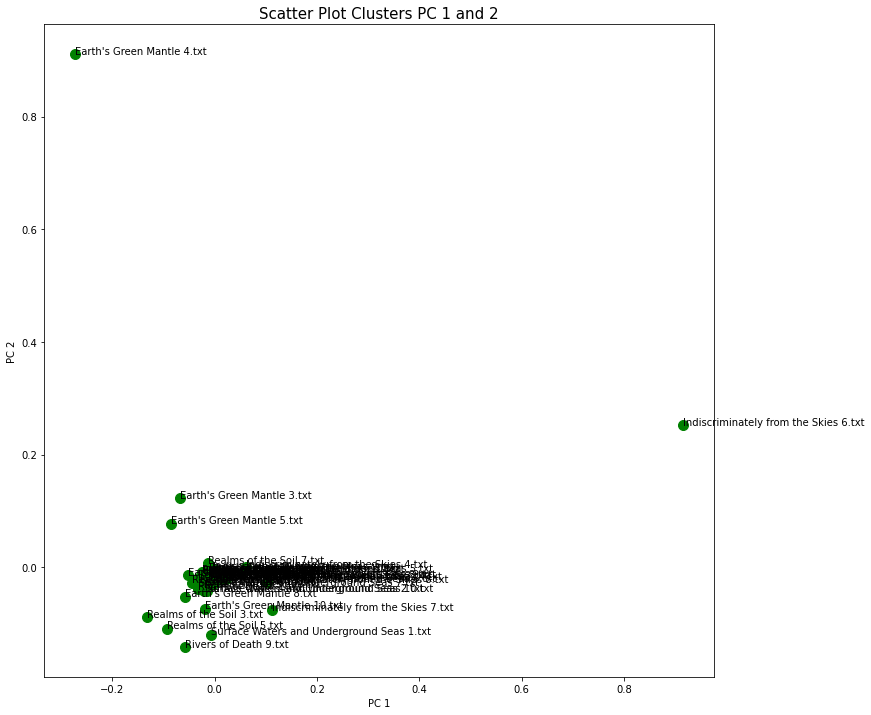

In [4]:
DF_Count_normalized=(DF_Count - DF_Count.mean()) / DF_Count.std()
print(DF_Count_normalized)

print(DF_Count_normalized.shape[0])   ## num rows
print(DF_Count_normalized.shape[1])   ## num cols

NumCols=DF_Count_normalized.shape[1]

## Instantiated my own copy of PCA
My_pca = PCA(n_components=2)  ## I want the two prin columns

## Transpose it
DF_Count_normalized = np.transpose(DF_Count_normalized)

My_pca.fit(DF_Count_normalized)

print(My_pca)
df = My_pca.components_.T
print(df)
Comps = pd.DataFrame(df,
                     columns=['PC%s' % _ for _ in range(2)],
                     index=DF_Count_normalized.columns
                    )
print(Comps)
print(Comps.iloc[:,0])
#RowNames = list(Comps.index)
#print(RowNames)

 
df.shape
plt.figure(figsize=(12,12))
plt.scatter(Comps.iloc[:,0], Comps.iloc[:,1], s=100, color="green")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Scatter Plot Clusters PC 1 and 2",fontsize=15)
for i, label in enumerate(FileNames):
    #print(i)
    #print(label)
    plt.annotate(label, (Comps.iloc[i,0], Comps.iloc[i,1]))

plt.show()


In [ ]:
# Kmeans = 3 #

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]


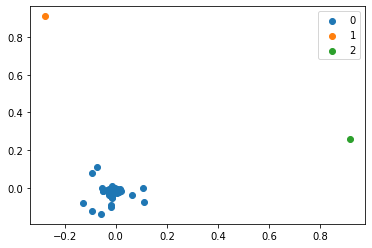

In [107]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Kmeans = 5

[3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 2 3 3 3 3 3 4 3 3 3 3 3 3 3 3 0 4 3 1
 3 3 3 3 3 0 4 3 3 4 3 3 3]


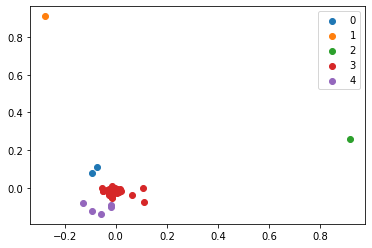

In [108]:
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Kmeans = 8 #

[0 0 0 7 0 0 0 7 0 0 7 7 0 0 0 0 7 5 2 0 0 7 5 0 3 5 0 0 0 0 0 7 0 4 6 7 1
 0 7 7 0 0 4 6 0 7 3 7 0 0]


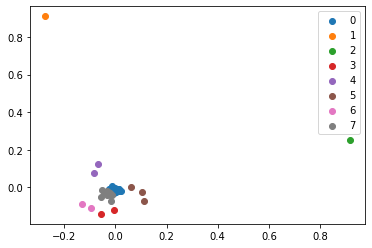

In [5]:
kmeans = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# DNSCAN #

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


Text(0.5, 1.0, 'DBSCAN')

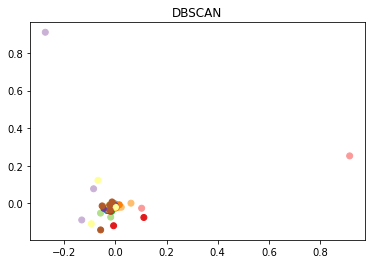

In [20]:
MyDBSCAN = DBSCAN(eps=0.0001, min_samples=1)
## eps:
    ## The maximum distance between two samples for
    ##one to be considered as in the neighborhood of the other.
y_pred = MyDBSCAN.fit_predict(DF_Count)
print(MyDBSCAN.labels_)
plt.scatter(df[:,0], df[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [ ]:
# Hierarchical Clustering #

[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 3 1 0 1 0 1 1 1 1 1 1 1 0 1 1 4 2 1 4
 1 2 1 1 1 4 2 1 1 1 1 1 1]


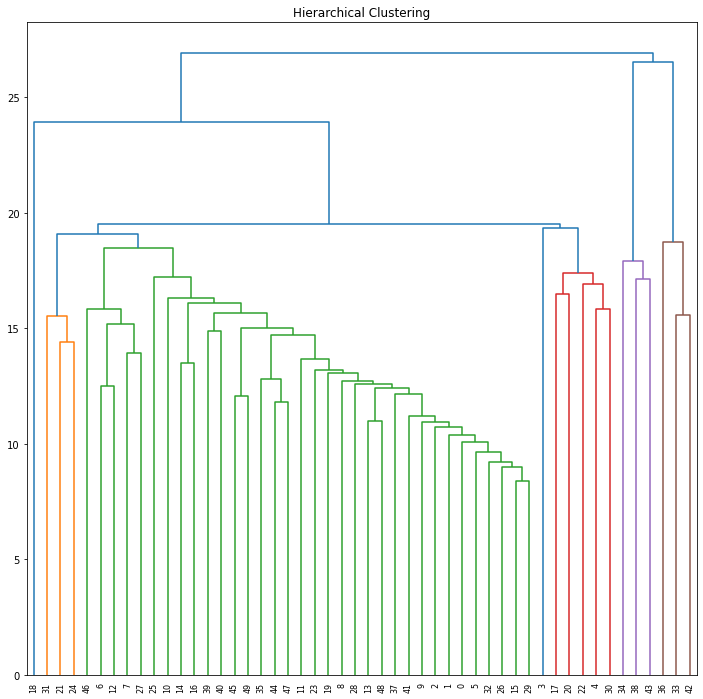

In [17]:
MyHC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
FIT=MyHC.fit(DF_Count)
HC_labels = MyHC.labels_
print(HC_labels)


plt.figure(figsize =(12, 12))
plt.title('Hierarchical Clustering')
dendro = hc.dendrogram((hc.linkage(DF_Count, method ='ward')))



In [ ]:
# Best Values for k #

2
3
4
5
6
7
8
9
[1.0755418556895622, 0.15395156490228762, 0.10210332911411188, 0.06598882774334411, 0.034183677583162916, 0.02605670258288048, 0.019511940626406484, 0.015712232837501804]
range(2, 10)


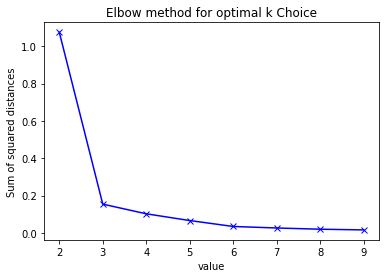

In [111]:
################################################
##
##         Look at best values for k
##
###################################################
SS_dist = []

values_for_k = range(2, 10)
# print(values_for_k)

for k_val in values_for_k:
    print(k_val)
    k_means = KMeans(n_clusters=k_val)
    model = k_means.fit(df)
    SS_dist.append(k_means.inertia_)

print(SS_dist)
print(values_for_k)

plt.plot(values_for_k, SS_dist, 'bx-')
plt.xlabel('value')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k Choice')
plt.show()

In [ ]:
# Silhouette #

[0.8855071086277863, 0.8967688062186777, 0.5626509900496374, 0.609030566793427, 0.6342907600725731, 0.4655670632695253, 0.4018316865866124, 0.3779032322857068]
[41.25733526051543, 281.79082331726073, 285.0159983950504, 329.7168086166218, 506.06560968117907, 542.9157272103893, 627.572585056274, 655.8777318006363]


Text(0.5, 0, 'k values')

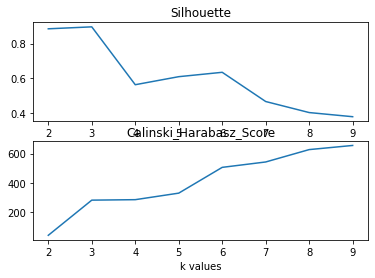

In [112]:
Sih=[]
Cal=[]
k_range=range(2,10)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(df)
    Pred = k_means_n.predict(df)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(df, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(df, labels_n)
    Sih.append(R1)
    Cal.append(R2)

print(Sih) ## higher is better
print(Cal) ## higher is better

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(k_range,Sih)
ax1.set_title("Silhouette")
ax1.set_xlabel("")
ax2.plot(k_range,Cal)
ax2.set_title("Calinski_Harabasz_Score")
ax2.set_xlabel("k values")